## Class object mlclusters with geno file

Here I used an example geno file instead of a generated dataset (see mlclusters_nb_simulated_data.ipynb) to run the class object mlclusters.

### 1. Import libraries

In [1]:
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics

### 2. Run class object mlclusters
I created a class object called mlclusters which fits a KMeans clustering method, evaluate the clustering performance, and plot. 

In [2]:
class Mlclusters:
    
    def __init__(self, ddrad, n_cluster):
        
        self.ddrad = ddrad
        self.n_cluster = n_cluster
        self.kmeans_labels = self._fit_kmeans
        self.evaluate_performance = self._evaluate_performance
        self.plot_kmeans = self._plot_kmeans
         

    # private functions
    def _fit_kmeans(self):
        """
        Fit Kmeans clustering method 
        """  
        kmeans_model = KMeans(self.n_cluster, random_state=1).fit(self.ddrad)
        labels = kmeans_model.labels_
        return labels
    
        
    def _evaluate_performance(self):
        """
        Evaluate clustering performace using Silhouette Coefficient and Calinski-Harabaz Index
        """  
        s_score = metrics.silhouette_score((self.ddrad), self.kmeans_labels(), metric='euclidean')
        ch_score = metrics.calinski_harabaz_score((self.ddrad), self.kmeans_labels())

        return pd.Series(
            {"Silhouette Coefficient": s_score,
             "Calinski-Harabaz Index": ch_score,
            })
    
    
    def _plot_kmeans(self):
        """
        Creating a visual plot
        """  

        # Compute clustering with KMeans

        k_means = KMeans(self.n_cluster, init='k-means++', n_init=10)
        k_means.fit(self.ddrad)

        # The following bandwidth can be automatically detected using

        labels = k_means.labels_
        cluster_centers = k_means.cluster_centers_

        labels_unique = np.unique(labels)
        n_clusters_ = len(labels_unique)

        # Plot result
        plt.figure(1)
        plt.clf() # Clear the current figure.

        colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
        for k, col in zip(range(n_clusters_), colors):
            my_members = labels == k
            cluster_center = cluster_centers[k]
            plt.plot(self.ddrad[my_members, 0], self.ddrad[my_members, 1], col + '.')
            plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.show()   
    
        # public function


### 3. Open an example geno file

In [6]:
geno = "/Users/teachinghouse/PDSB/mlclusters/data/example.geno"

In [15]:
with open(geno) as indata:
    idata = indata.read()

In [16]:
idata = np.array([list(i) for i in idata.split()], dtype=float)

In [18]:
idata

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 1.],
       [2., 2., 2., ..., 0., 0., 2.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 0.]])

In [19]:
idata.shape

(9405, 12)

### 4. Check for any missing data

In [12]:
# check for any missing data. 9s are missing data
np.any(data==9)

True

In [13]:
# replace 9 with non
data[data==9] = np.nan
#data = data.astype(int)

In [14]:
# check for any missing data
np.any(np.isnan(data))

True

In [15]:
# check for any missing data indicated as 9
np.any(data==9)

False

In [17]:
# Creat an object 
fish = Mlclusters(data, 3)

In [58]:
fish.kmeans_labels()

NameError: name 'fish' is not defined

### 5. Transpose the matrix

In [21]:
idata.T

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 0., ..., 2., 2., 2.],
       [2., 2., 0., ..., 2., 2., 2.],
       [2., 1., 2., ..., 2., 2., 0.]])

In [23]:
idata.T.shape

(12, 9405)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

iX = idata.T

In [37]:
scaler.fit(iX)
Xt = scaler.transform(iX)
Xt

array([[ 0.30151134,  0.30151134,  0.57735027, ...,  0.30151134,
         0.30151134, -0.20227835],
       [ 0.30151134,  0.30151134,  0.57735027, ...,  0.30151134,
         0.30151134, -0.20227835],
       [ 0.30151134,  0.30151134,  0.57735027, ...,  0.30151134,
         0.30151134, -0.20227835],
       ...,
       [ 0.30151134,  0.30151134, -1.73205081, ...,  0.30151134,
         0.30151134, -0.20227835],
       [ 0.30151134,  0.30151134, -1.73205081, ...,  0.30151134,
         0.30151134, -0.20227835],
       [ 0.30151134, -3.31662479,  0.57735027, ...,  0.30151134,
         0.30151134, -1.17321442]])

In [54]:
# Creat an object 
ifish = Mlclusters(Xt, 10)

In [55]:
ifish.kmeans_labels()

array([1, 9, 5, 7, 2, 2, 8, 4, 6, 6, 0, 3], dtype=int32)

In [56]:
ifish.evaluate_performance()

Calinski-Harabaz Index    1.845193
Silhouette Coefficient    0.046620
dtype: float64

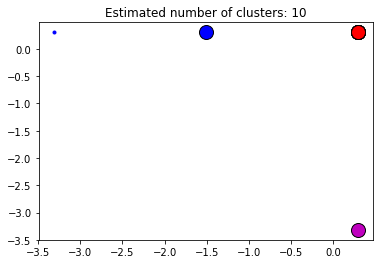

In [57]:
ifish.plot_kmeans()

In [48]:
fish.ddrad.shape

(9405, 12)

In [14]:
f = (100, 10)
f[1]

10

In [106]:
x = np.zeros((3, 10), dtype=int)
x

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [109]:
y = x.T
y

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [21]:
np.array(f)

In [49]:
np.transpose(fish.ddrad).shape

(12, 9405)

In [50]:
data2 = np.transpose(fish.ddrad)

In [53]:
fish2 = Mlclusters(data2, 3)

In [54]:
fish2.kmeans_labels()

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2], dtype=int32)

In [119]:
fish2.n_cluster


3

In [55]:
fish2.evaluate_performance()

Calinski-Harabaz Index    3.441104
Silhouette Coefficient    0.199038
dtype: float64

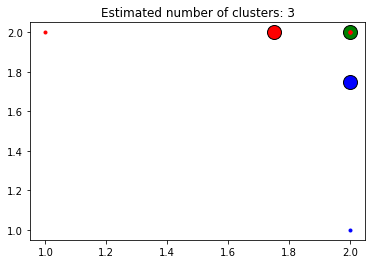

In [56]:
fish2.plot_kmeans()

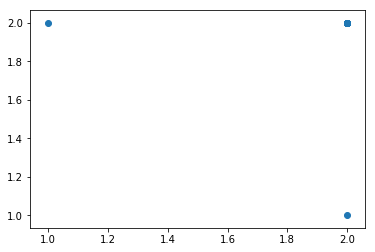

In [64]:
plt.scatter(data2[:, 0], data2[:, 1])